# Creating Sample Correlation Figures

**Gregory Way 2018**

Here, I create figures that summarize the correlation analysis.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(RColorBrewer))

In [2]:
# Load helper functions
source(file.path("scripts", "util.R"))

In [3]:
# Create theme
correlation_theme <- theme(axis.text.x = element_text(angle = 90, size = 5),
                           plot.title = element_text(hjust = 0.5),
                           legend.text = element_text(size = 8),
                           legend.key.size = unit(0.7, 'lines'))

## Panel A - Full TCGA Correlations for Testing Set Across Algorithms

In [4]:
file <- file.path("results", "TCGA_sample_correlation_phenotype.tsv.gz")
tcga_full_df <- readr::read_tsv(file,
                                col_types = readr::cols(
                                    .default = readr::col_character(),
                                    correlation = readr::col_double(),
                                    seed = readr::col_integer(),
                                    num_comp = readr::col_integer()
                                )
                               )

print(dim(tcga_full_df))

head(tcga_full_df)

[1] 30968000       11


algorithm,id,correlation,cor_type,seed,data,num_comp,dataset_id,shuffled,sample_class,sample_type
pca,TCGA-LL-A73Z-01,0.905,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,BRCA
ica,TCGA-LL-A73Z-01,0.905,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,BRCA
nmf,TCGA-LL-A73Z-01,0.892,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,BRCA
dae,TCGA-LL-A73Z-01,0.883,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,BRCA
vae,TCGA-LL-A73Z-01,0.903,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,BRCA
pca,TCGA-55-8207-01,0.768,pearson,486191,training,10,TCGA,signal,Primary Solid Tumor,LUAD


In [5]:
tcga_subset_df <- subset_correlations(df = tcga_full_df,
                                      cor_type = "pearson",
                                      data_type = "testing",
                                      signal_type = "signal")

print(dim(tcga_subset_df))

head(tcga_subset_df)

[1] 154840      7


id,data,num_comp,algorithm,sample_type,median_corr,correlation
TCGA-04-1519-01,testing,2,dae,OV,0.521,0.521
TCGA-04-1519-01,testing,2,ica,OV,0.534,0.534
TCGA-04-1519-01,testing,2,nmf,OV,0.531,0.531
TCGA-04-1519-01,testing,2,pca,OV,0.534,0.534
TCGA-04-1519-01,testing,2,vae,OV,0.534,0.534
TCGA-04-1519-01,testing,3,dae,OV,0.523,0.523


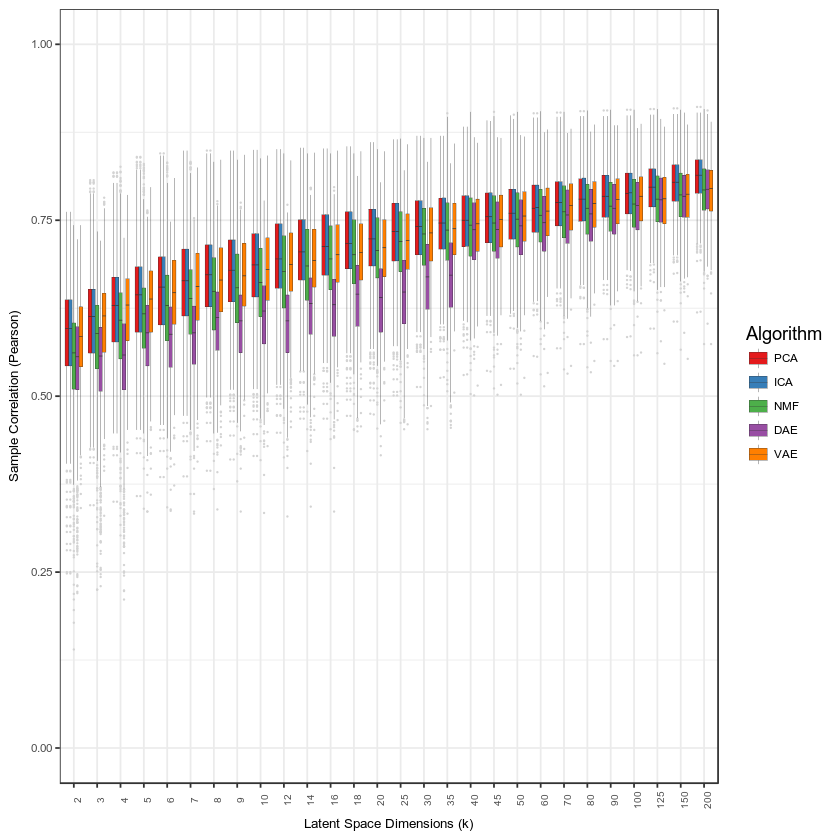

In [6]:
tcga_full_corr_gg <- plot_correlation_summary(df = tcga_subset_df)
tcga_full_corr_gg

## Panel B - Select Cancer Types Correlation Means across Dimensions

Plotted here are Pearson Correlations of Signal Data in the Testing Set (models are not trained on these samples)

In [7]:
select_cancer_types <- c("BRCA", "COAD", "LGG", "PCPG", "LAML")
mean_cor_palette <- colorRampPalette(rev(brewer.pal(9, "YlGn")))

In [8]:
file <- file.path("results", "TCGA_sample_correlation_phenotype_summary.tsv.gz")
tcga_summary_df <- readr::read_tsv(file,
                                   col_types = readr::cols(
                                       .default = readr::col_character(),
                                       num_comp = readr::col_integer(),
                                       mean_cor = readr::col_double(),
                                       var_cor = readr::col_double()
                                   )
                                  )

head(tcga_summary_df)

algorithm,sample_type,num_comp,cor_type,shuffled,data,mean_cor,var_cor
pca,ACC,2,pearson,shuffled,training,0.1701577,0.0008099581
pca,ACC,2,pearson,shuffled,testing,0.0087250,0.0001592814
pca,ACC,2,pearson,signal,training,0.6447324,0.0019596881
pca,ACC,2,pearson,signal,testing,0.4765000,0.0010905128
pca,ACC,2,spearman,shuffled,training,0.3729211,0.0004277056
pca,ACC,2,spearman,shuffled,testing,0.0115000,0.0001959487


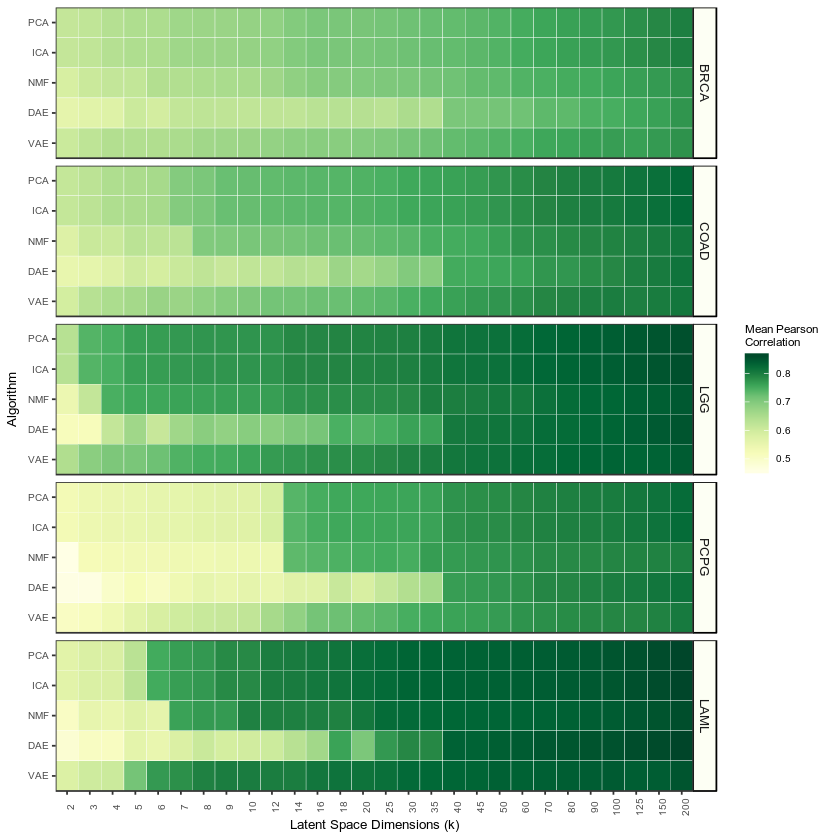

In [9]:
tcga_subset_summary_df <- process_summary_df(summary_df = tcga_summary_df,
                                             select_sample_types = select_cancer_types,
                                             cor_type = 'pearson',
                                             data_type = 'testing',
                                             signal_type = 'signal')

tcga_select_cancertype_gg <- plot_subset_summary(tcga_subset_summary_df, palette = mean_cor_palette)
tcga_select_cancertype_gg

## Panel C - Plot Overall Gain in Correlation As Capacity Increases for TCGA and select cancer-types

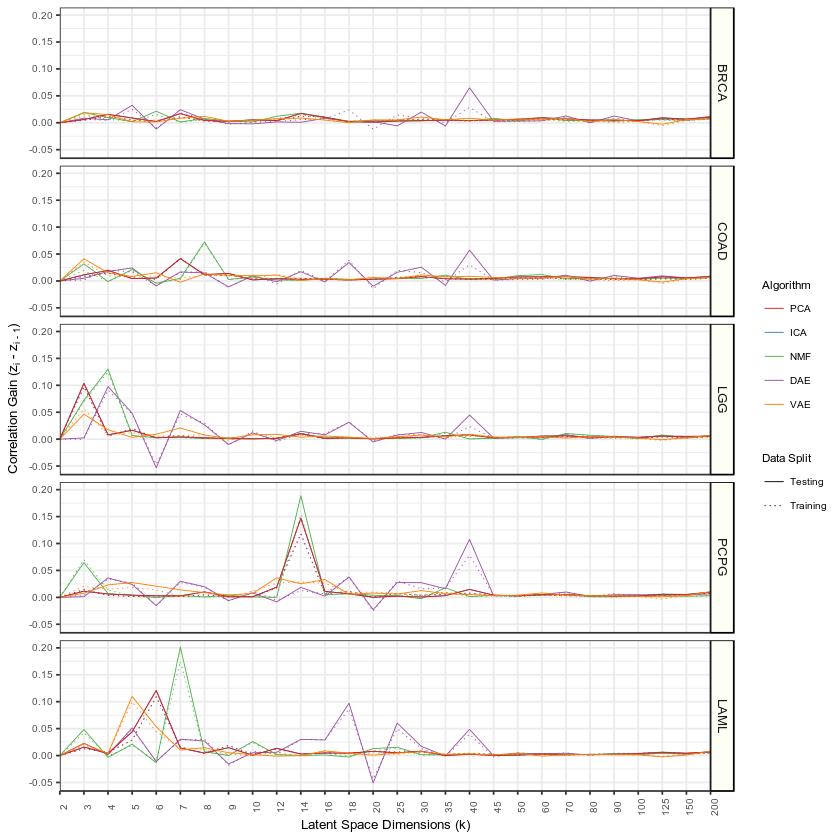

In [10]:
tcga_capacity_gain_df <- process_capacity(tcga_summary_df, select_cancer_types)
tcga_select_cancertype_capactity_gain_gg <- plot_capacity_difference(tcga_capacity_gain_df)

tcga_select_cancertype_capactity_gain_gg

## Panel D - Plot Overall Gain in Correlation As Capacity Increases for GTEX and select tissue types

In [11]:
select_tissues <- c("Liver", "Pancreas", "Blood")

In [12]:
file <- file.path("results", "GTEX_sample_correlation_phenotype_summary.tsv.gz")
gtex_summary_df <- readr::read_tsv(file,
                                   col_types = readr::cols(
                                       .default = readr::col_character(),
                                       num_comp = readr::col_integer(),
                                       mean_cor = readr::col_double(),
                                       var_cor = readr::col_double()
                                   )
                                  )

head(gtex_summary_df)

algorithm,sample_type,num_comp,cor_type,shuffled,data,mean_cor,var_cor
pca,Adipose Tissue,2,pearson,shuffled,training,0.1707905,8.277689e-04
pca,Adipose Tissue,2,pearson,shuffled,testing,0.0007000,9.116291e-05
pca,Adipose Tissue,2,pearson,signal,training,0.8364449,2.390166e-03
pca,Adipose Tissue,2,pearson,signal,testing,0.7622750,2.476491e-03
pca,Adipose Tissue,2,spearman,shuffled,training,0.4381693,4.390514e-04
pca,Adipose Tissue,2,spearman,shuffled,testing,0.0009275,2.319621e-04


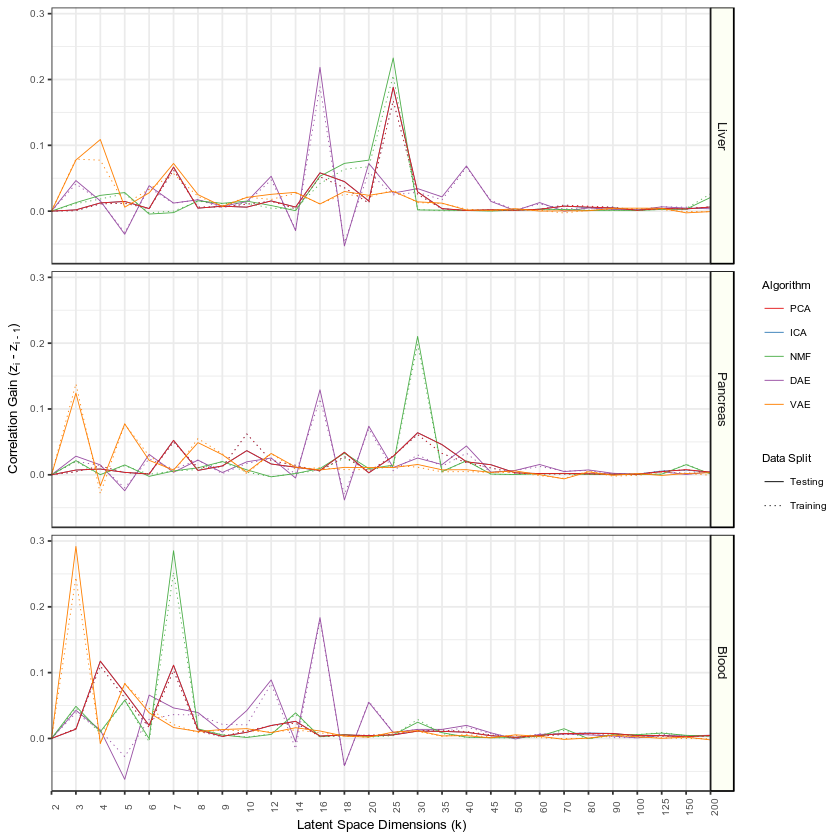

In [13]:
gtex_capacity_gain_df <- process_capacity(gtex_summary_df, select_tissues)
gtex_select_tissuetype_capactity_gain_gg <- plot_capacity_difference(gtex_capacity_gain_df)

gtex_select_tissuetype_capactity_gain_gg

## Create Main Figure

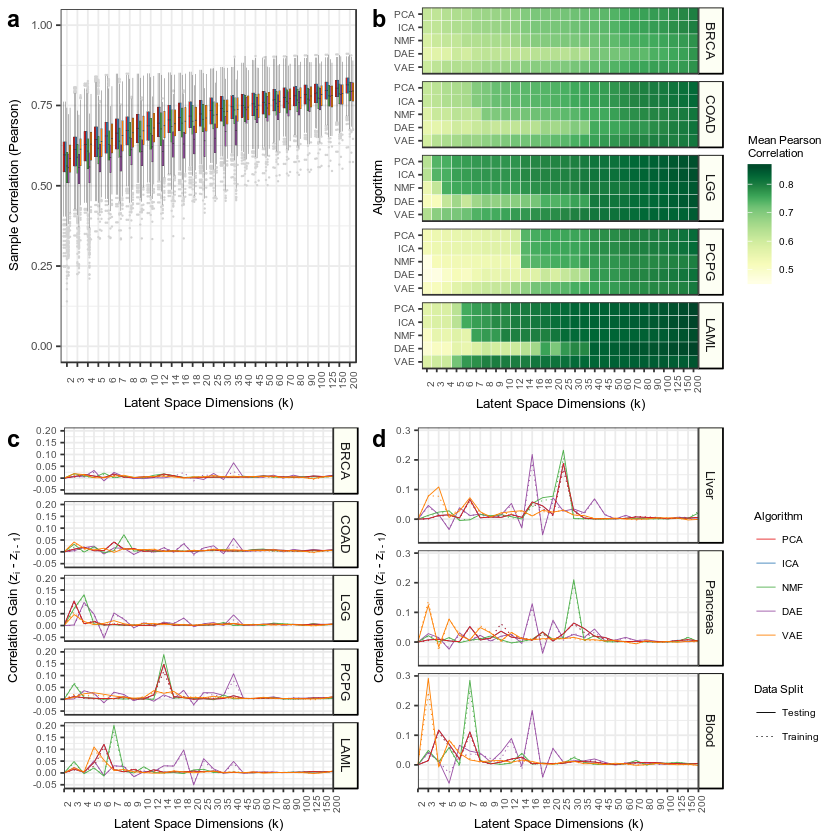

In [14]:
alg_legend <- cowplot::get_legend(gtex_select_tissuetype_capactity_gain_gg) 
cor_legend <- cowplot::get_legend(tcga_select_cancertype_gg) 

legend <- (
    cowplot::plot_grid(
        cor_legend,
        alg_legend,
        nrow = 2
    )
)

main_plot <- (
    cowplot::plot_grid(
        tcga_full_corr_gg + theme(legend.position = 'none'),
        tcga_select_cancertype_gg + theme(legend.position = "none"),
        tcga_select_cancertype_capactity_gain_gg + theme(legend.position = 'none'),
        gtex_select_tissuetype_capactity_gain_gg + theme(legend.position = 'none'),
        labels = c("a", "b", "c", "d"),
        ncol = 2,
        nrow = 2
    )
)

main_plot = cowplot::plot_grid(main_plot, legend, rel_widths = c(1, 0.15), ncol = 2)
main_plot

In [15]:
for(extension in c('.png', '.pdf')) {
    sup_file <- paste0("correlation_summary", extension)
    sup_file <- file.path("figures", sup_file)
    cowplot::save_plot(filename = sup_file,
                       plot = main_plot,
                       base_height = 150,
                       base_width = 170,
                       unit = "mm")
}

# Build Supplementary Figure for Correlation Analysis

## Sup Fig: Panel A - GTEX Correlations (Real and Shuffled)

In [16]:
file <- file.path("results", "GTEX_sample_correlation_phenotype.tsv.gz")
gtex_full_df <- readr::read_tsv(file,
                                col_types = readr::cols(
                                    .default = readr::col_character(),
                                    correlation = readr::col_double(),
                                    seed = readr::col_integer(),
                                    num_comp = readr::col_integer()
                                )
                               )

print(dim(gtex_full_df))

head(gtex_full_df)

[1] 32726400       10


algorithm,id,correlation,cor_type,seed,data,num_comp,dataset_id,shuffled,sample_type
pca,GTEX-T5JC-1526-SM-4DM68,0.740,pearson,486191,training,10,GTEX,signal,Kidney
ica,GTEX-T5JC-1526-SM-4DM68,0.740,pearson,486191,training,10,GTEX,signal,Kidney
nmf,GTEX-T5JC-1526-SM-4DM68,0.725,pearson,486191,training,10,GTEX,signal,Kidney
dae,GTEX-T5JC-1526-SM-4DM68,0.674,pearson,486191,training,10,GTEX,signal,Kidney
vae,GTEX-T5JC-1526-SM-4DM68,0.751,pearson,486191,training,10,GTEX,signal,Kidney
pca,GTEX-XMK1-0326-SM-4B652,0.701,pearson,486191,training,10,GTEX,signal,Pancreas


In [17]:
gtex_subset_df <- subset_correlations(df = gtex_full_df,
                                      cor_type = "pearson",
                                      data_type = "testing",
                                      signal_type = "signal")

     
gtex_subset_shuffled_df <- subset_correlations(df = gtex_full_df,
                                               cor_type = "pearson",
                                               data_type = "testing",
                                               signal_type = "shuffled")

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1689 rows containing non-finite values (stat_boxplot).”

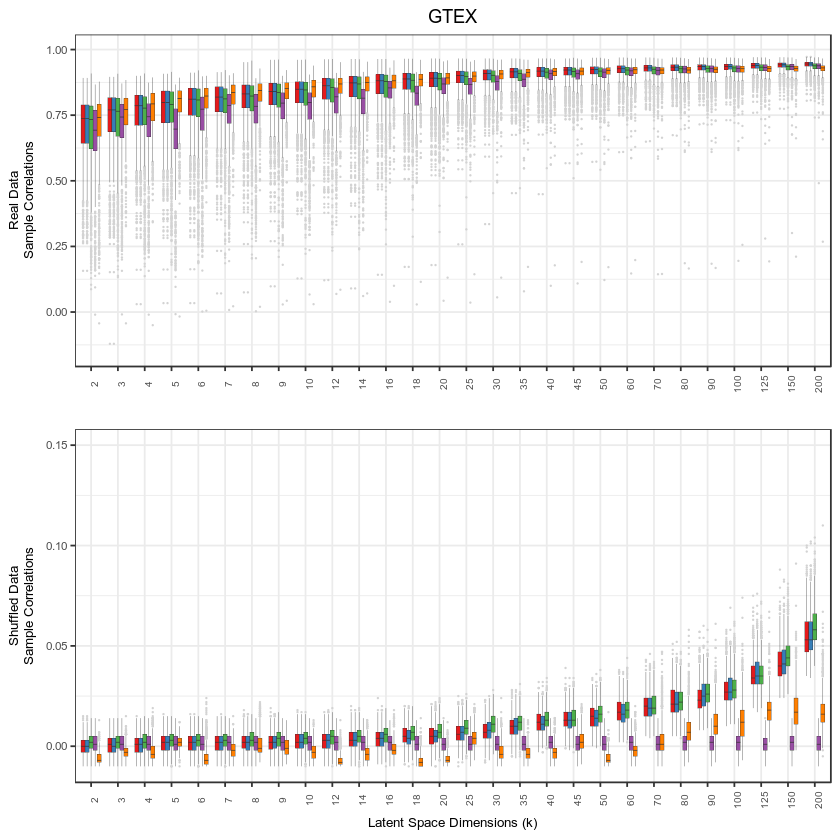

In [18]:
gtex_full_corr_gg <- plot_correlation_summary(df = gtex_subset_df,
                                              ylimits = c(-0.15, 1))
gtex_full_corr_shuffled_gg <- plot_correlation_summary(df = gtex_subset_shuffled_df,
                                                       ylimits = c(-0.01, 0.15))

gtex_full_cor_gg <- cowplot::plot_grid(
    gtex_full_corr_gg +
        theme(legend.position = 'none') +
        ylab('Real Data\nSample Correlations') +
        ggtitle('GTEX') +
        xlab(''),
    gtex_full_corr_shuffled_gg +
        theme(legend.position = "none") +
        ylab('Shuffled Data\nSample Correlations'),
    labels = c("", ""),
    ncol = 1,
    nrow = 2
)

gtex_full_cor_gg

## Sup Fig: Panel B - TARGET Correlations (Real and Shuffled)

In [19]:
file <- file.path("results", "TARGET_sample_correlation_phenotype.tsv.gz")
target_full_df <- readr::read_tsv(file,
                                  col_types = readr::cols(
                                      .default = readr::col_character(),
                                      correlation = readr::col_double(),
                                      seed = readr::col_integer(),
                                      num_comp = readr::col_integer()
                                  )
                                 )

print(dim(target_full_df))

head(target_full_df)

[1] 2055200      15


algorithm,id,correlation,cor_type,seed,data,num_comp,dataset_id,shuffled,sample_type,_primary_disease,sample_type_code,_sample_type,_PATIENT,_cohort
pca,TARGET-30-PARSBI-01,0.872,pearson,486191,training,10,TARGET,signal,NBL,Neuroblastoma,TP,Primary Solid Tumor,PARSBI,TARGET
ica,TARGET-30-PARSBI-01,0.872,pearson,486191,training,10,TARGET,signal,NBL,Neuroblastoma,TP,Primary Solid Tumor,PARSBI,TARGET
nmf,TARGET-30-PARSBI-01,0.870,pearson,486191,training,10,TARGET,signal,NBL,Neuroblastoma,TP,Primary Solid Tumor,PARSBI,TARGET
dae,TARGET-30-PARSBI-01,0.858,pearson,486191,training,10,TARGET,signal,NBL,Neuroblastoma,TP,Primary Solid Tumor,PARSBI,TARGET
vae,TARGET-30-PARSBI-01,0.864,pearson,486191,training,10,TARGET,signal,NBL,Neuroblastoma,TP,Primary Solid Tumor,PARSBI,TARGET
pca,TARGET-20-PADZCG-09,0.854,pearson,486191,training,10,TARGET,signal,AML,AML,TBM,Primary Blood Derived Cancer - Bone Marrow,PADZCG,TARGET


In [20]:
target_subset_df <- subset_correlations(df = target_full_df,
                                        cor_type = "pearson",
                                        data_type = "testing",
                                        signal_type = "signal")

     
target_subset_shuffled_df <- subset_correlations(df = target_full_df,
                                                 cor_type = "pearson",
                                                 data_type = "testing",
                                                 signal_type = "shuffled")

Warning message:
“Removed 13 rows containing non-finite values (stat_boxplot).”

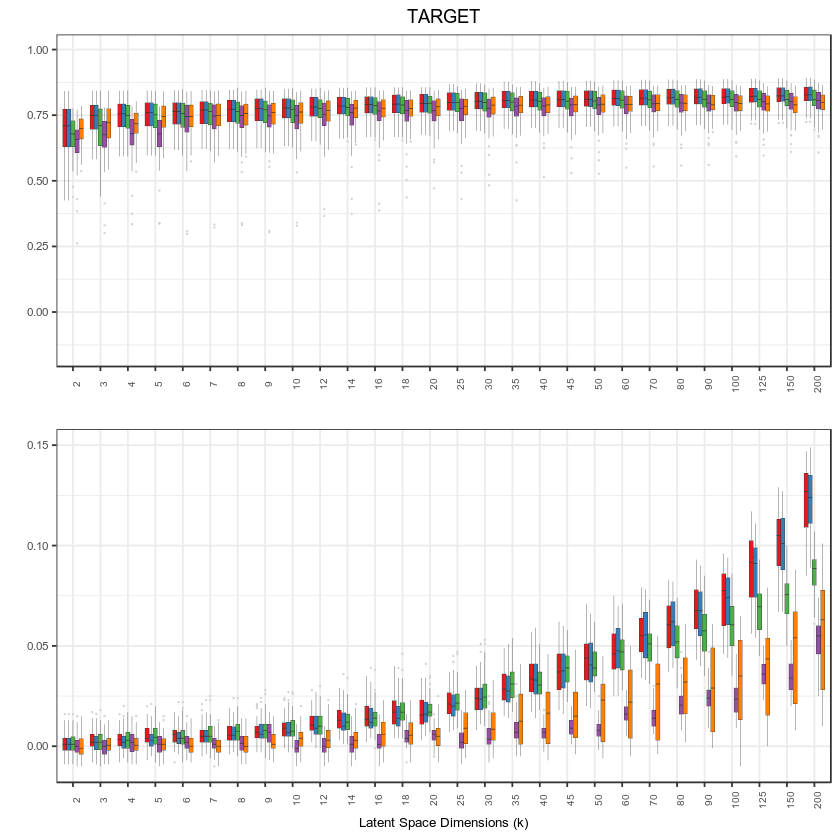

In [21]:
target_full_corr_gg <- plot_correlation_summary(df = target_subset_df,
                                               ylimits = c(-0.15, 1))
target_full_corr_shuffled_gg <- plot_correlation_summary(df = target_subset_shuffled_df,
                                                         ylimits =  c(-0.01, 0.15))

target_full_cor_gg <- cowplot::plot_grid(
    target_full_corr_gg +
        theme(legend.position = 'none') +
        ylab('') +
        xlab('') +
        ggtitle('TARGET'),
    target_full_corr_shuffled_gg +
        theme(legend.position = "none") +
        ylab(''),
    labels = c("", ""),
    ncol = 1,
    nrow = 2
)

target_full_cor_gg

## Sup Fig: Panel C - TCGA Shuffled Data

In [22]:
tcga_shuffled_subset_df <- subset_correlations(
    df = tcga_full_df,
    cor_type = "pearson",
    data_type = "testing",
    signal_type = "shuffled"
    )

print(dim(tcga_shuffled_subset_df))

head(tcga_shuffled_subset_df)

[1] 154840      7


id,data,num_comp,algorithm,sample_type,median_corr,correlation
TCGA-04-1519-01,testing,2,dae,OV,0.000,0.000
TCGA-04-1519-01,testing,2,ica,OV,0.007,0.007
TCGA-04-1519-01,testing,2,nmf,OV,0.000,0.000
TCGA-04-1519-01,testing,2,pca,OV,0.007,0.007
TCGA-04-1519-01,testing,2,vae,OV,-0.005,-0.005
TCGA-04-1519-01,testing,3,dae,OV,0.000,0.000


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

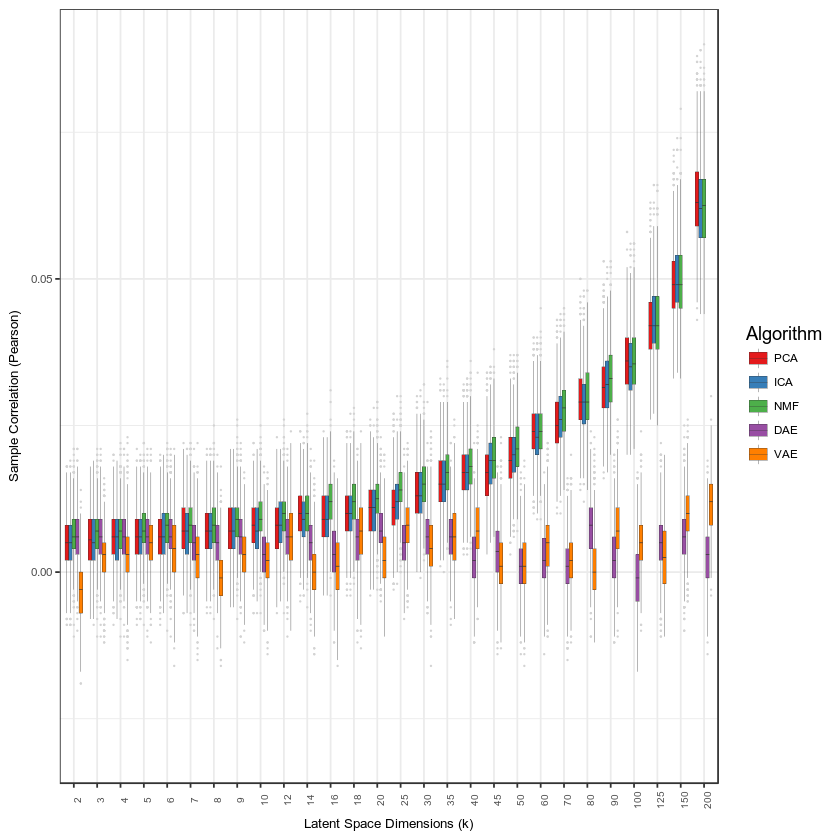

In [23]:
tcga_full_corr_shuffled_gg <- plot_correlation_summary(df = tcga_shuffled_subset_df,
                                                       ylimits = c(-0.03, 0.09))
tcga_full_corr_shuffled_gg

## Sup Fig: Panel D - Shuffled Cancer-type Correlations

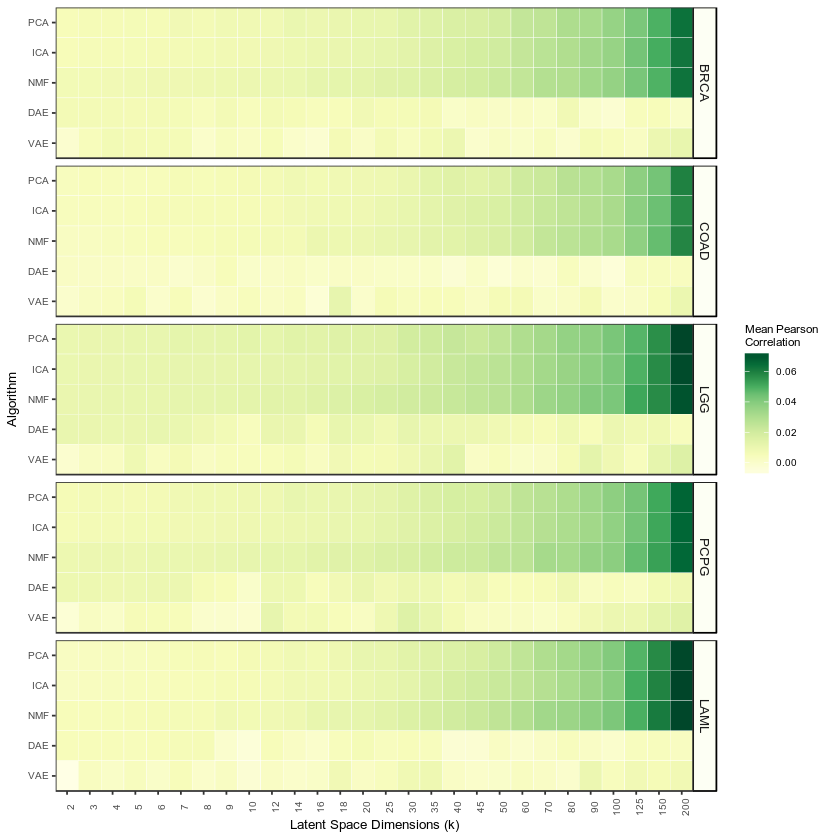

In [24]:
tcga_subset_shuffled_summary_df <- 
    process_summary_df(summary_df = tcga_summary_df,
                       select_sample_types = select_cancer_types,
                       cor_type = 'pearson',
                       data_type = 'testing',
                       signal_type = 'shuffled')

tcga_select_shuffled_cancertype_gg <-
    plot_subset_summary(tcga_subset_shuffled_summary_df,
                        palette = mean_cor_palette)
tcga_select_shuffled_cancertype_gg

## Compile Supplementary Figure

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

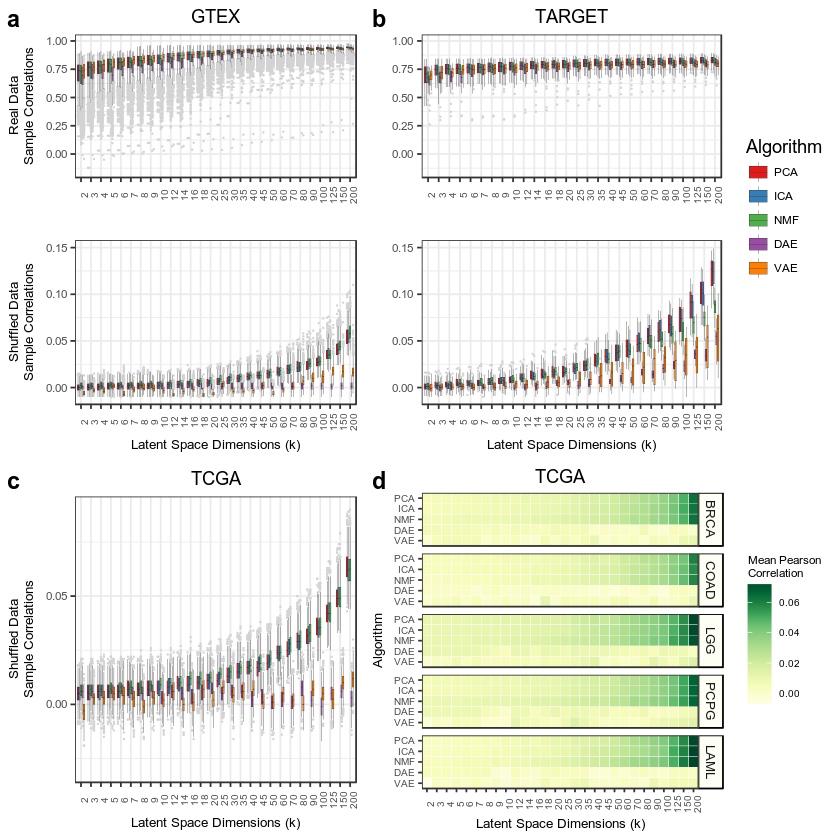

In [25]:
alg_legend <- cowplot::get_legend(tcga_full_corr_shuffled_gg) 
cor_legend <- cowplot::get_legend(tcga_select_shuffled_cancertype_gg) 

legend <- (
    cowplot::plot_grid(
        alg_legend,
        cor_legend,
        nrow = 2
    )
)

main_plot <- (
    cowplot::plot_grid(
        gtex_full_cor_gg,
        target_full_cor_gg,
        tcga_full_corr_shuffled_gg +
            theme(legend.position = 'none') +
            ggtitle('TCGA') +
            ylab('Shuffled Data\nSample Correlations'),
        tcga_select_shuffled_cancertype_gg +
            theme(legend.position = "none") +
            ggtitle('TCGA'),
        labels = c("a", "b", "c", "d"),
        ncol = 2,
        nrow = 2,
        rel_heights = c(1.1, 0.9)
    )
)

main_plot = cowplot::plot_grid(main_plot,
                               legend,
                               rel_widths = c(1, 0.15),
                               ncol = 2)
main_plot

In [26]:
for(extension in c('.png', '.pdf')) {
    sup_file <- paste0("supplemental_correlation_summary", extension)
    sup_file <- file.path("figures", sup_file)
    cowplot::save_plot(filename = sup_file,
                       plot = main_plot,
                       base_height = 150,
                       base_width = 170,
                       unit = "mm")
}